In [142]:
#imprt library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns



In [143]:
# Load data
orders_df = pd.read_csv("C:/Users/ranee/OneDrive/سطح المكتب/orders.csv")
order_items_df = pd.read_csv("C:/Users/ranee/OneDrive/سطح المكتب/order_items.csv")
products_df = pd.read_csv("C:/Users/ranee/OneDrive/سطح المكتب/products.csv")
customers_df = pd.read_csv("C:/Users/ranee/OneDrive/سطح المكتب/Customers.csv")


In [144]:
# Convert order_purchase_timestamp to datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

In [145]:
# Merge dataframes for analysis
product_data = pd.merge(orders_df,customers_df, on='customer_id')
full_sales_data = pd.merge(product_data, order_items_df, on='order_id')
f_sales_data = pd.merge(full_sales_data, products_df, on='product_id')

In [146]:
# Merge dataframes for analysis
sales_data = pd.merge(order_items_df, orders_df, on='order_id')
full_sales_data = pd.merge(sales_data, products_df, on='product_id')

## Task 1: Top selling products in general and by region


In [147]:
# Calculate total sales per product by general
top_selling_general = f_sales_data.groupby('product_id')['order_id'].count().reset_index(name='total_sales').sort_values(by='total_sales', ascending=False)
# Calculate total sales per product by region
top_selling_by_region = f_sales_data.groupby(['product_id', 'customer_state'])['order_id'].count().reset_index(name='total_sales').sort_values(by='total_sales', ascending=False)

print("\nBest-selling products in general:")
print(top_selling_general)
print("\nBest-selling products by region:")
print(top_selling_by_region)


Best-selling products in general:
                             product_id  total_sales
22112  aca2eb7d00ea1a7b8ebd4e68314663af          527
19742  99a4788cb24856965c36a24e339b6058          488
8613   422879e10f46682990de24d770e7f83d          484
7364   389d119b48cf3043d311335e499d9c6b          392
7079   368c6c730842d78016ad823897a372db          388
...                                 ...          ...
14037  6ca99f05e9c1952a6597264e87f01378            1
14036  6ca54e191592a843087a042b0665d7ef            1
14035  6ca5428af5edb5066b1966ad58501b60            1
14034  6ca32b4631431cb1fe976880797a0f5c            1
32950  fffe9eeff12fcbd74a2f2b007dde0c58            1

[32951 rows x 2 columns]

Best-selling products by region:
                             product_id customer_state  total_sales
41177  aca2eb7d00ea1a7b8ebd4e68314663af             SP          265
36580  99a4788cb24856965c36a24e339b6058             SP          231
15982  422879e10f46682990de24d770e7f83d             SP          1

C:\Users\ranee\AppData\Local\Temp\ipykernel_30256\1452296492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='total_sales', y='product_id', data=top_selling_general.head(20), palette="crest")


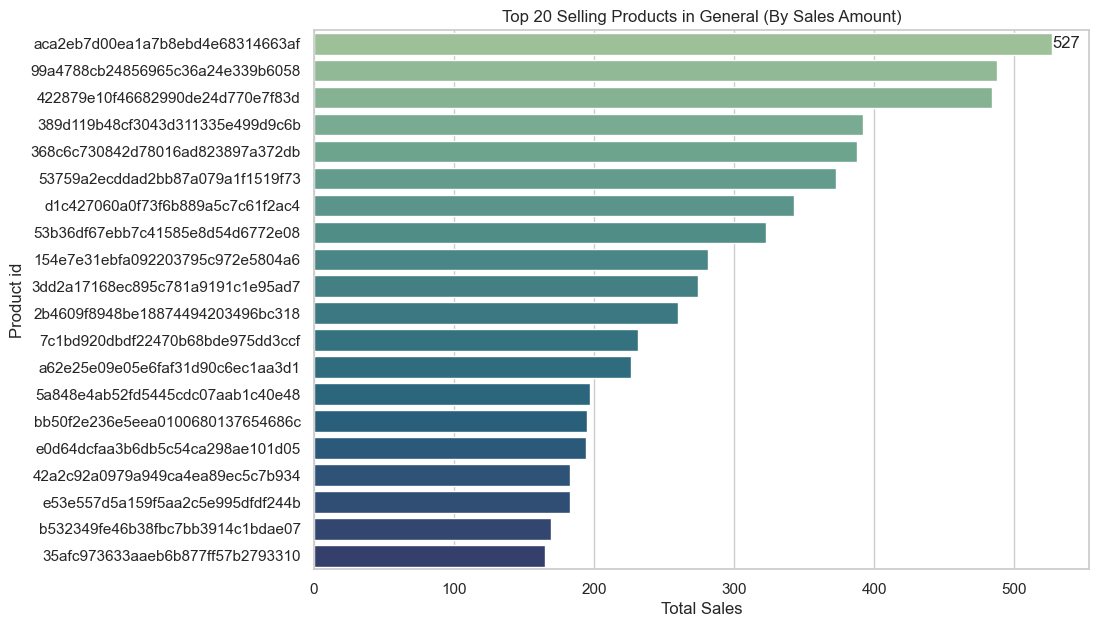

In [148]:
# Visualize the top-selling products in general

plt.figure(figsize=(10, 7))
ax=sns.barplot(x='total_sales', y='product_id', data=top_selling_general.head(20), palette="crest")
plt.title("Top 20 Selling Products in General (By Sales Amount)")
plt.xlabel("Total Sales")
plt.ylabel("Product id")
ax.bar_label(ax.containers[0]) 
plt.show()

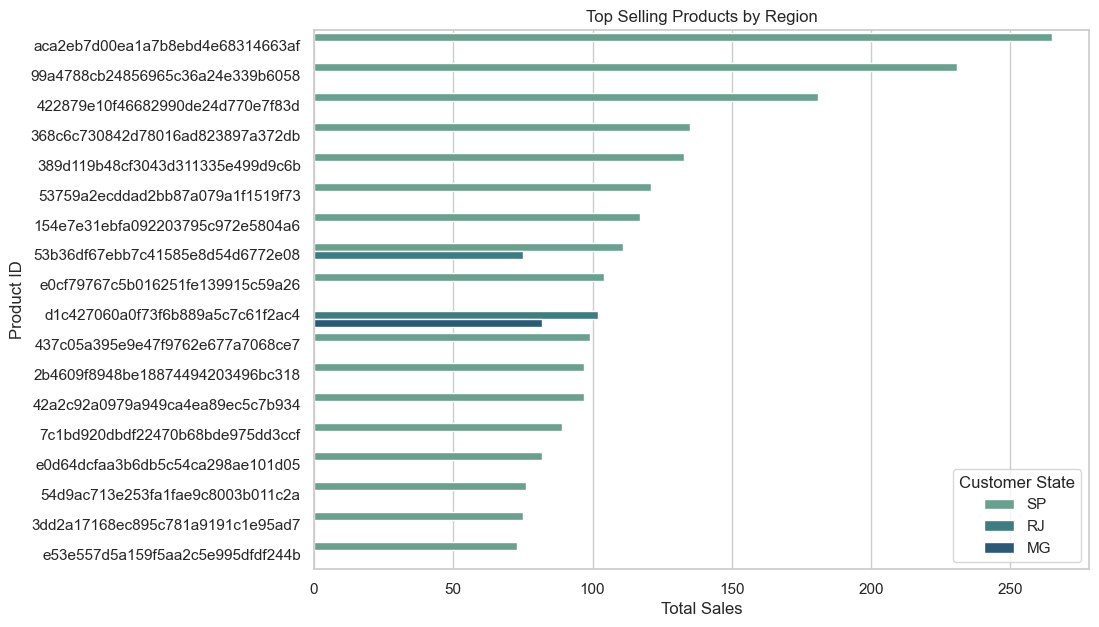

In [149]:
# Plotting the top-selling products by region
plt.figure(figsize=(10,7))
sns.barplot(x='total_sales', y='product_id', hue='customer_state', data=top_selling_by_region.head(20), palette='crest')
plt.title('Top Selling Products by Region')
plt.xlabel('Total Sales')
plt.ylabel('Product ID')
plt.legend(title='Customer State')
plt.show()


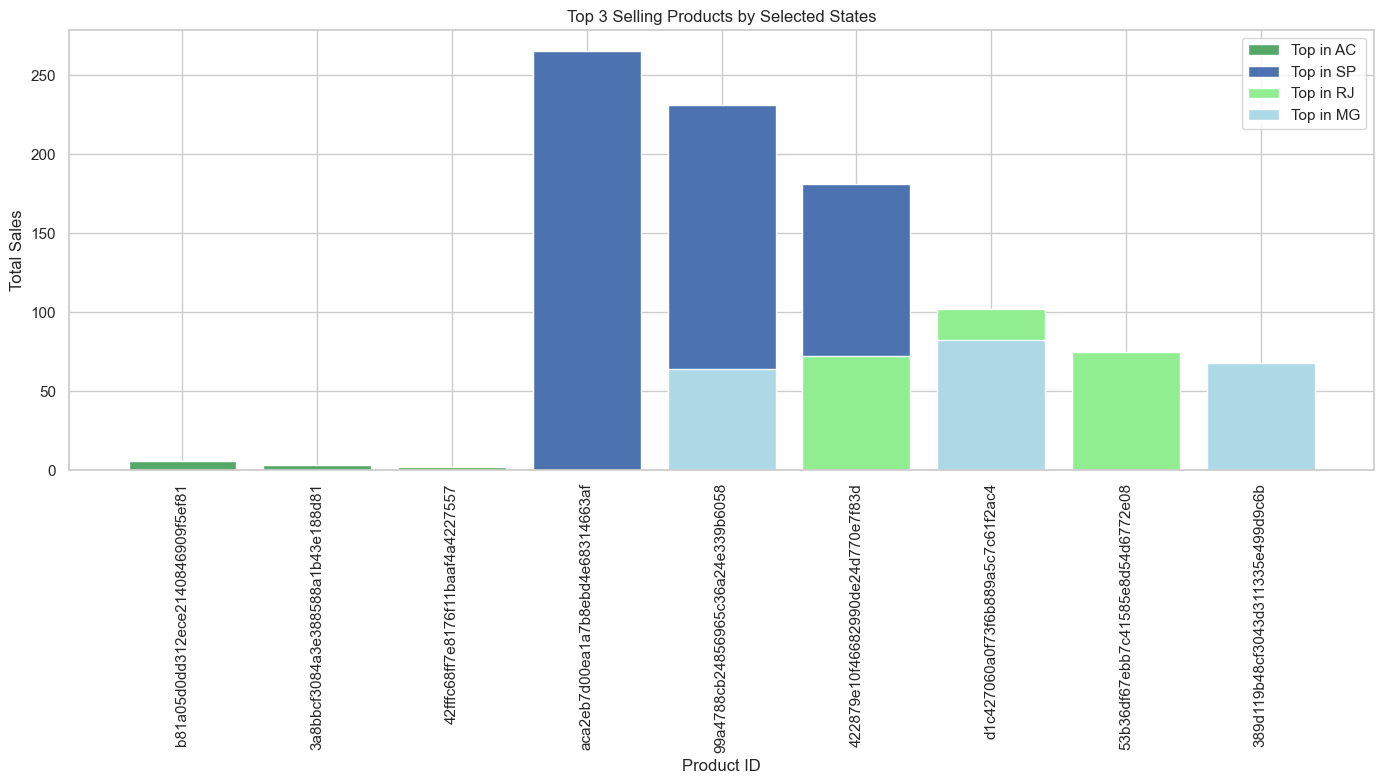

In [150]:
# Filter to top 3 products for a few states for visualization
selected_states = ['AC', 'SP', 'RJ', 'MG']
top_products_selected_states = top_selling_by_region[top_selling_by_region['customer_state'].isin(selected_states)]
top_products_selected_states = top_products_selected_states.groupby('customer_state').head(3)

# Define colors for each state
colors = {'AC': 'g', 'SP': 'b', 'RJ': 'lightgreen', 'MG': 'lightblue'}
# Create the plot
plt.figure(figsize=(14, 8))
for state in selected_states:
    state_data = top_products_selected_states[top_products_selected_states['customer_state'] == state]
    plt.bar(state_data['product_id'], state_data['total_sales'],color=colors[state],label=f'Top in {state}')

plt.title('Top 3 Selling Products by Selected States')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Task 2: Most popular categories

In [151]:
#Most popular products categories
popular_categories = f_sales_data.groupby('product_category_name')['order_id'].count().reset_index(name='category_sales').sort_values(by='category_sales', ascending=False)
popular_categories

,product_category_name,category_sales
13,cama_mesa_banho,11115
11,beleza_saude,9670
32,esporte_lazer,8641
54,moveis_decoracao,8334
44,informatica_acessorios,7827
...,...,...
17,cds_dvds_musicais,14
46,la_cuisine,14
60,pc_gamer,9
37,fashion_roupa_infanto_juvenil,8


C:\Users\ranee\AppData\Local\Temp\ipykernel_30256\4226991885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='product_category_name', y='category_sales', data=popular_categories.head(10), palette='crest')


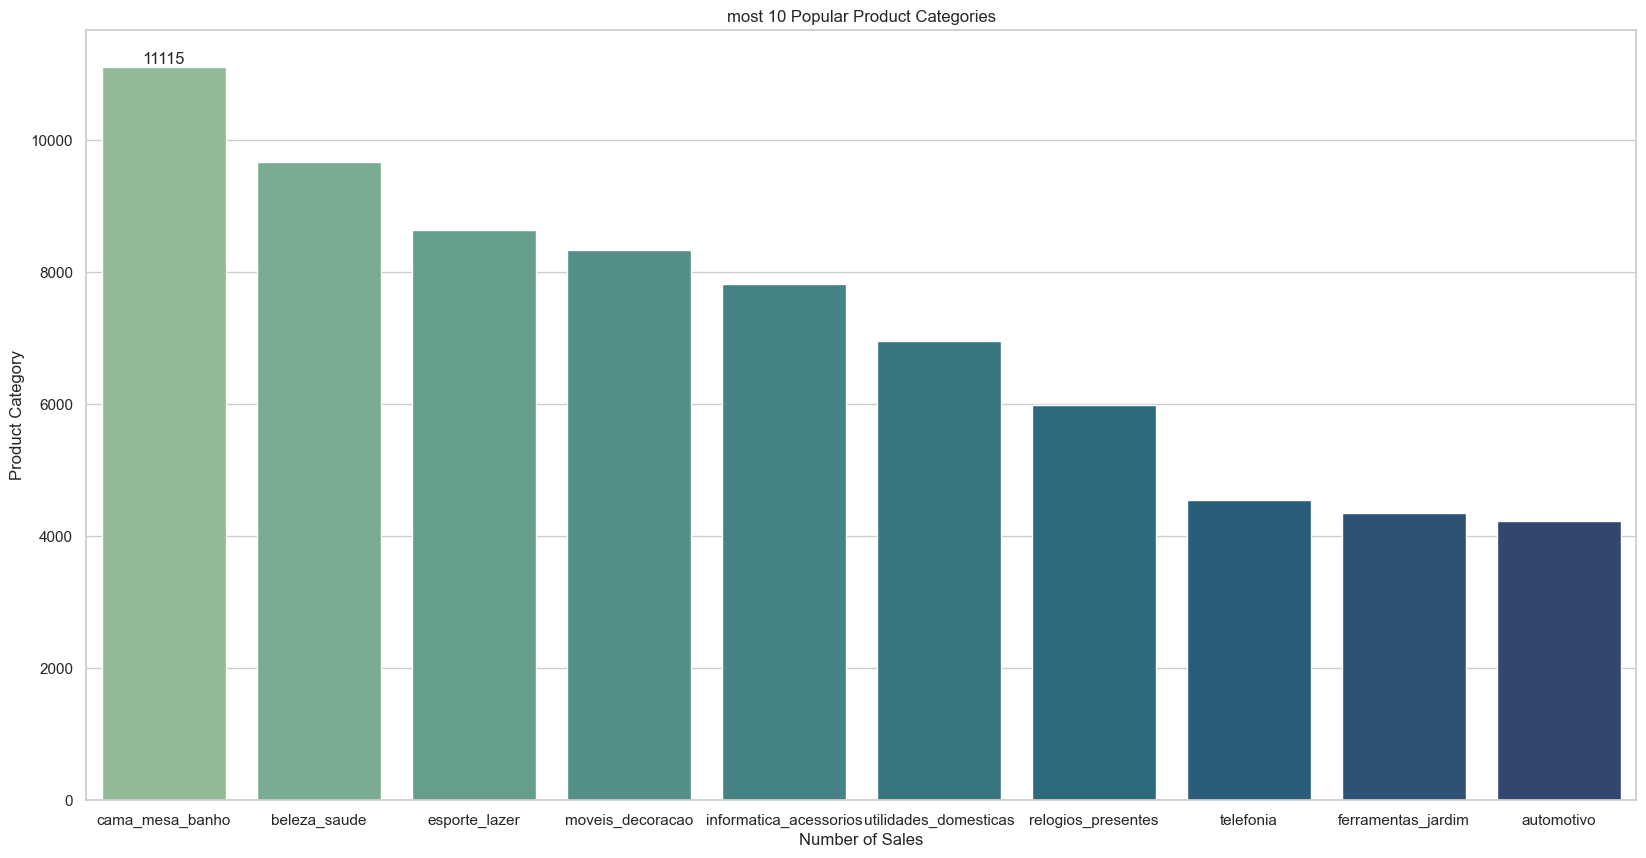

In [152]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot for popular categories
plt.figure(figsize=(20,10))
ax=sns.barplot(x='product_category_name', y='category_sales', data=popular_categories.head(10), palette='crest')

# Add titles and labels
plt.title('most 10 Popular Product Categories')
plt.xlabel('Number of Sales')
plt.ylabel('Product Category')
ax.bar_label(ax.containers[0]) 


# Show the plot
plt.show()

## Task 3: Monthly, quarterly, and yearly sales

In [153]:
sales_data
# Calculate monthly sales
monthly_sales = sales_data.resample('M', on='order_purchase_timestamp')['price'].sum().reset_index()

# Calculate quarterly sales
quarterly_sales = sales_data.resample('Q', on='order_purchase_timestamp')['price'].sum().reset_index()

# Calculate yearly sales
yearly_sales = sales_data.resample('Y', on='order_purchase_timestamp')['price'].sum().reset_index()


{
    "Monthly Sales": monthly_sales.head(),
    "Quarterly Sales": quarterly_sales.head(),
    "Yearly Sales": yearly_sales.head(),
    
}



C:\Users\ranee\AppData\Local\Temp\ipykernel_30256\2114505191.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.resample('M', on='order_purchase_timestamp')['price'].sum().reset_index()
C:\Users\ranee\AppData\Local\Temp\ipykernel_30256\2114505191.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = sales_data.resample('Q', on='order_purchase_timestamp')['price'].sum().reset_index()
C:\Users\ranee\AppData\Local\Temp\ipykernel_30256\2114505191.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = sales_data.resample('Y', on='order_purchase_timestamp')['price'].sum().reset_index()


{'Monthly Sales':   order_purchase_timestamp      price
 0               2016-09-30     267.36
 1               2016-10-31   49507.66
 2               2016-11-30       0.00
 3               2016-12-31      10.90
 4               2017-01-31  120312.87,
 'Quarterly Sales':   order_purchase_timestamp       price
 0               2016-09-30      267.36
 1               2016-12-31    49518.56
 2               2017-03-31   741960.19
 3               2017-06-30  1299036.97
 4               2017-09-30  1696404.85,
 'Yearly Sales':   order_purchase_timestamp       price
 0               2016-12-31    49785.92
 1               2017-12-31  6155806.98
 2               2018-12-31  7386050.80}

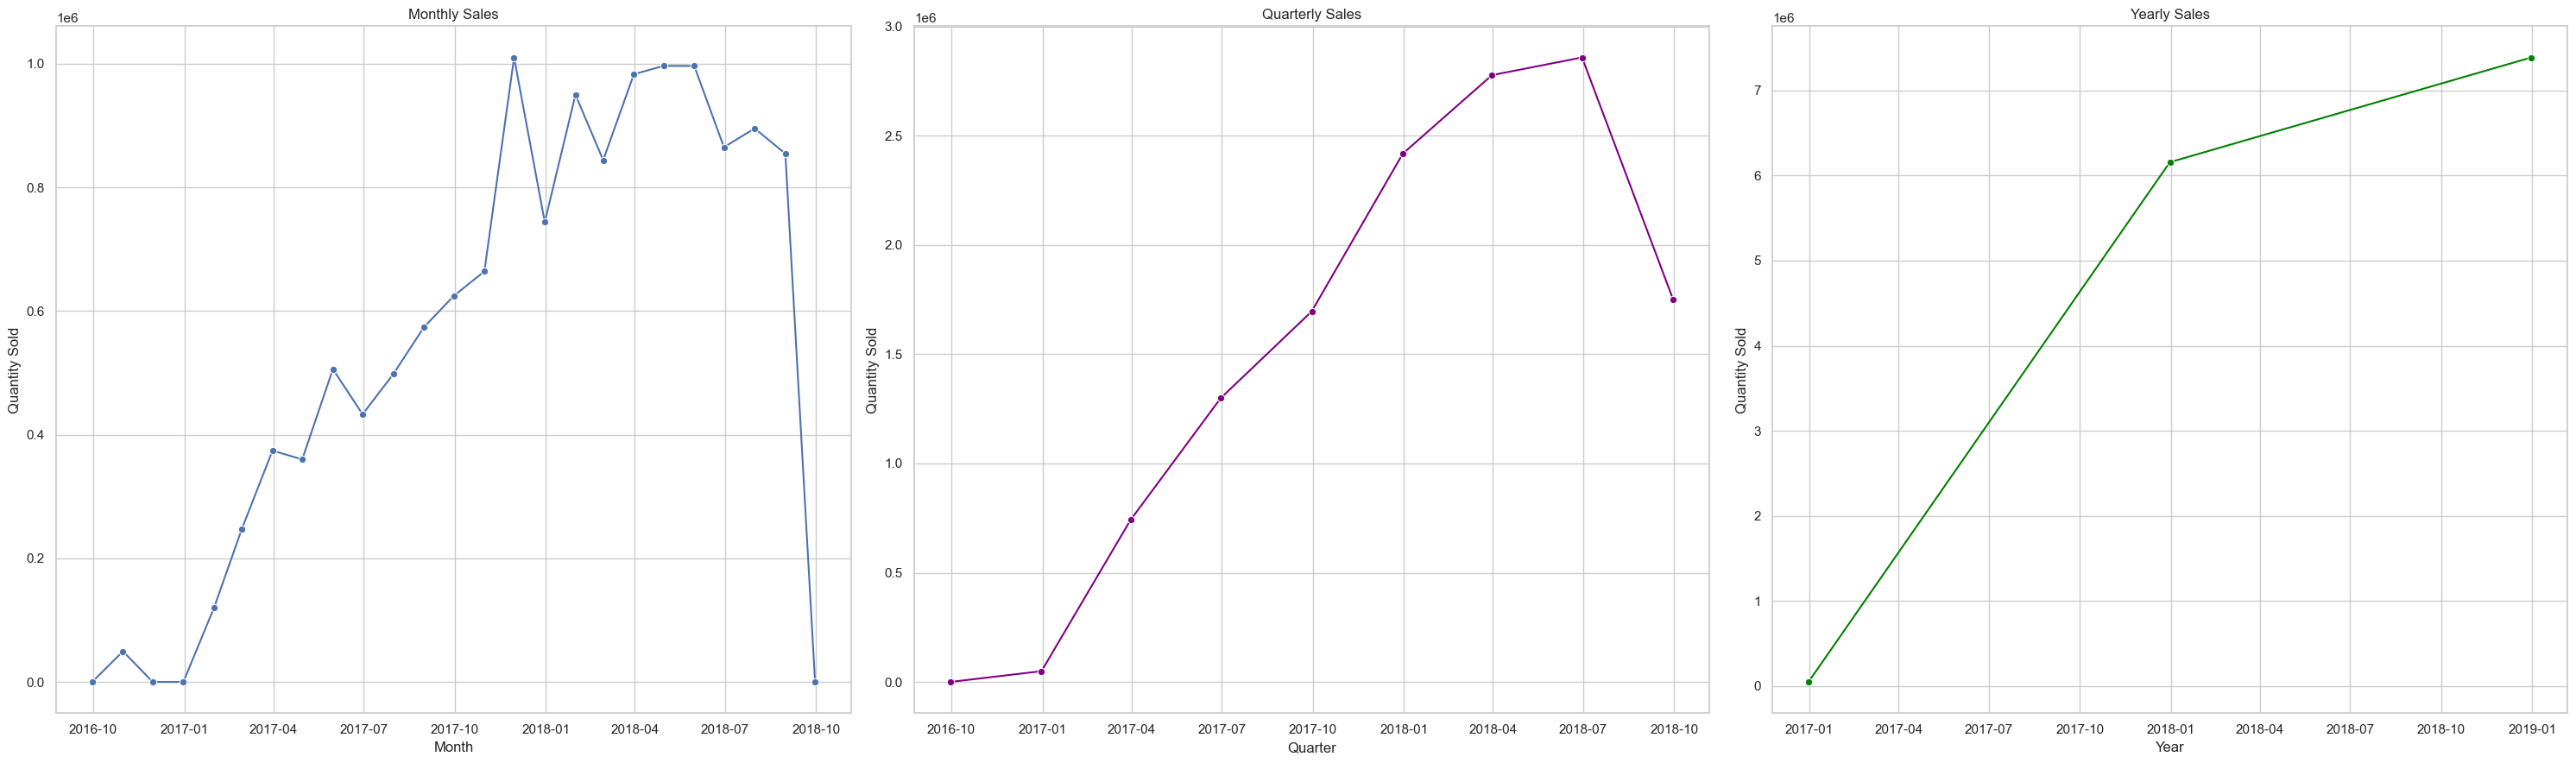

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Plot Monthly Sales
plt.figure(figsize=(30, 9))
plt.subplot(1, 3, 1)
sns.lineplot(data=monthly_sales, x='order_purchase_timestamp', y='price', marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')

# Plot Quarterly Sales
plt.subplot(1, 3, 2)
sns.lineplot(data=quarterly_sales, x='order_purchase_timestamp', y='price', marker='o', color='purple')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Quantity Sold')

# Plot Yearly Sales
plt.subplot(1, 3, 3)
sns.lineplot(data=yearly_sales, x='order_purchase_timestamp', y='price', marker='o', color='green')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')

plt.tight_layout()
plt.show()

### Task 4: Average sale by product category and top categories by customer location


In [155]:
#  Average sale by product category 
average_sale_by_category = f_sales_data.groupby('product_category_name')['price'].mean().reset_index(name='avg_price').sort_values(by=[ 'avg_price','product_category_name'], ascending=False)

# op categories by customer location
top_categories_by_location = f_sales_data.groupby(['product_category_name', 'customer_state'])['order_id'].count().reset_index(name='sales').sort_values(by=[ 'sales','customer_state'], ascending=False)

average_sale_by_category.head(10)
top_categories_by_location.head(50)

,product_category_name,customer_state,sales
282,cama_mesa_banho,SP,5235
229,beleza_saude,SP,4204
650,esporte_lazer,SP,3667
1029,moveis_decoracao,SP,3531
1366,utilidades_domesticas,SP,3265
842,informatica_acessorios,SP,3170
1256,relogios_presentes,SP,2281
159,automotivo,SP,1747
255,brinquedos,SP,1712
1318,telefonia,SP,1646


C:\Users\ranee\AppData\Local\Temp\ipykernel_30256\2406734260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='product_category_name', y='avg_price', data=average_sale_by_category.head(10), palette='crest')


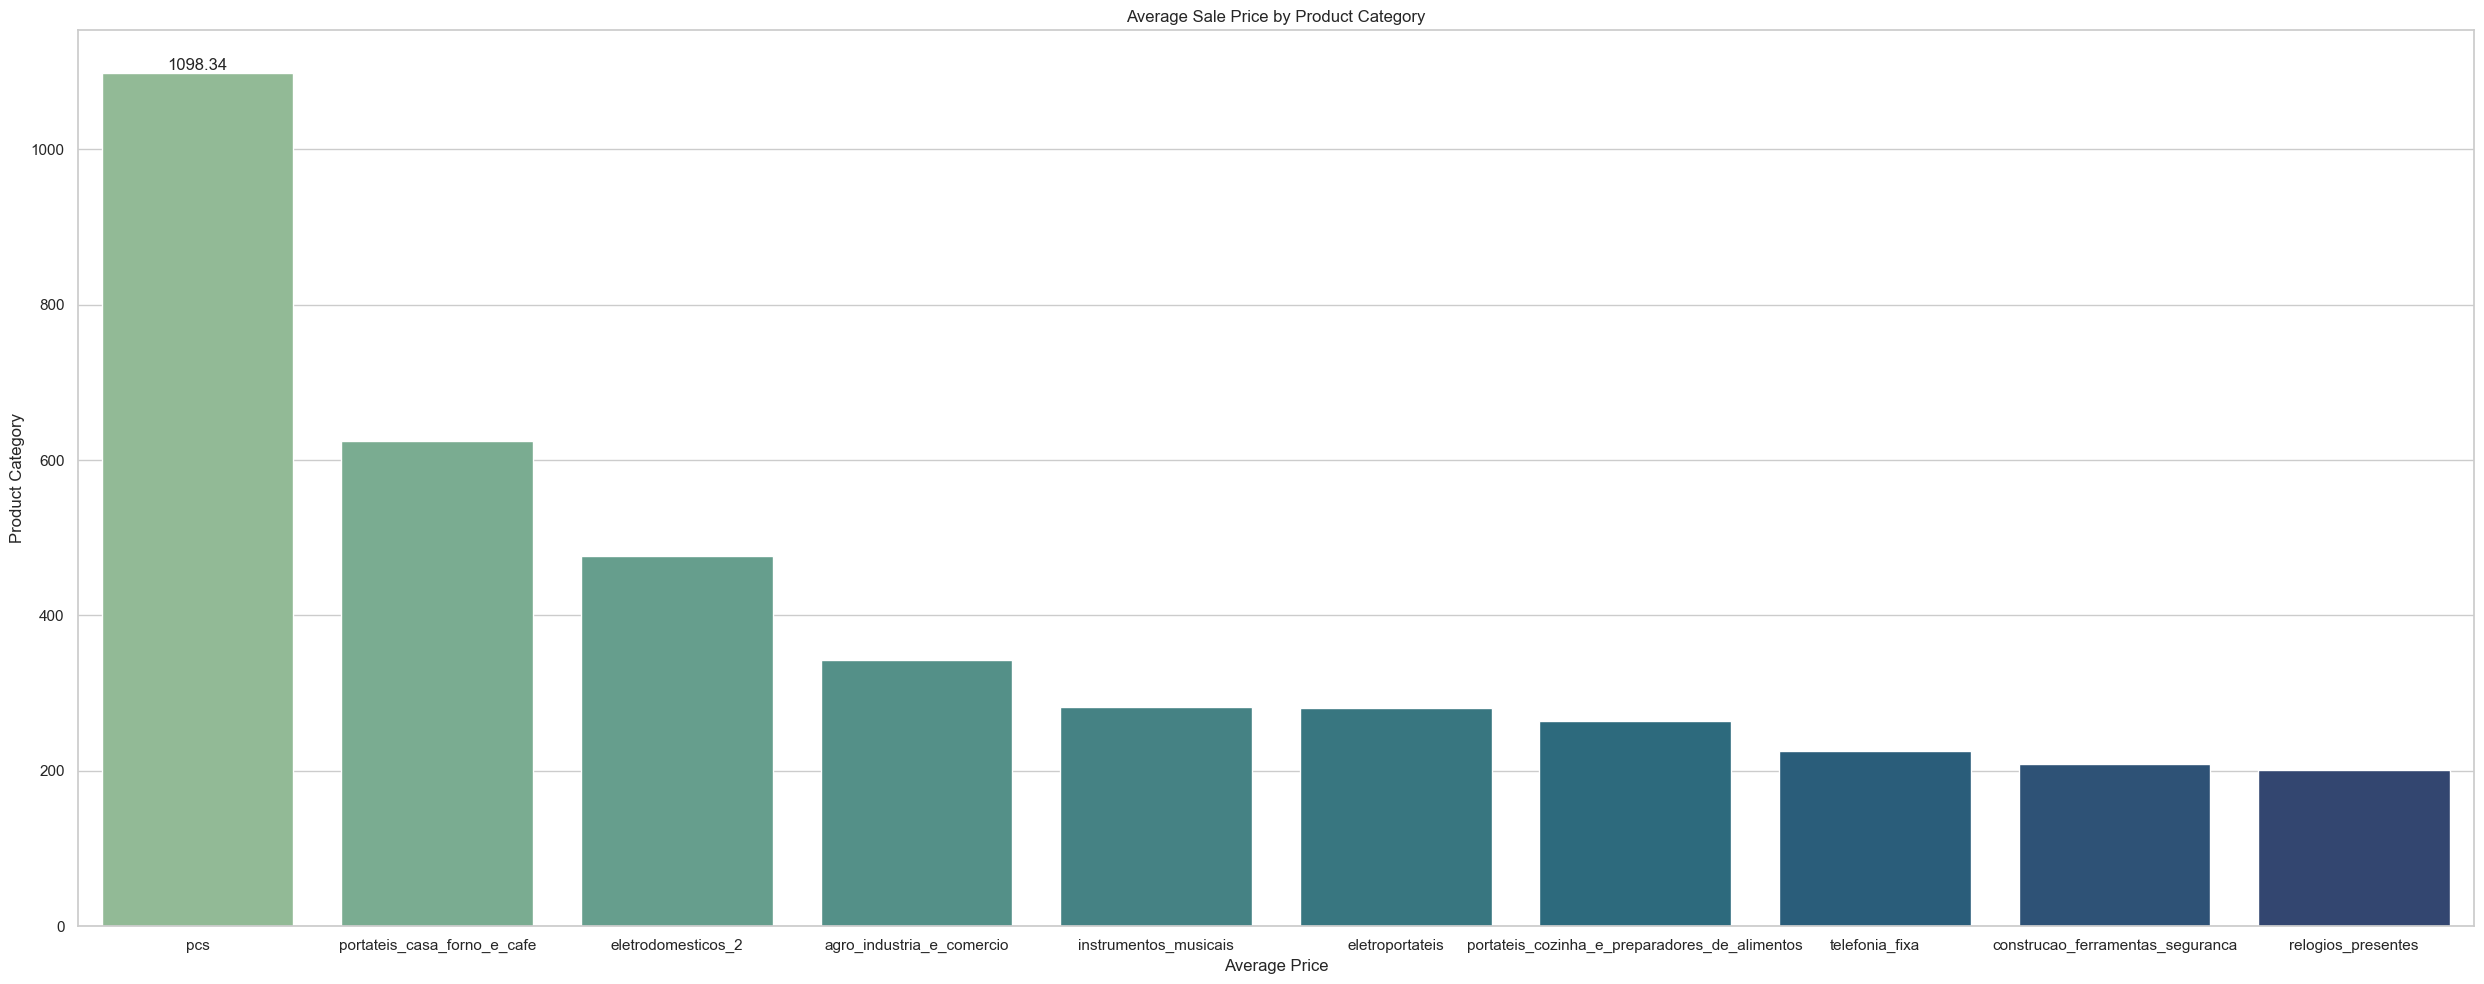

In [156]:
# Average sale by product category

sns.set_style("whitegrid")

plt.figure(figsize=(25,10))
ax=sns.barplot(x='product_category_name', y='avg_price', data=average_sale_by_category.head(10), palette='crest')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.title('Average Sale Price by Product Category')
#plt.gca().invert_yaxis()  # To display the highest average price at the top
plt.tight_layout()
ax.bar_label(ax.containers[0]) 
# Show plot
plt.show()

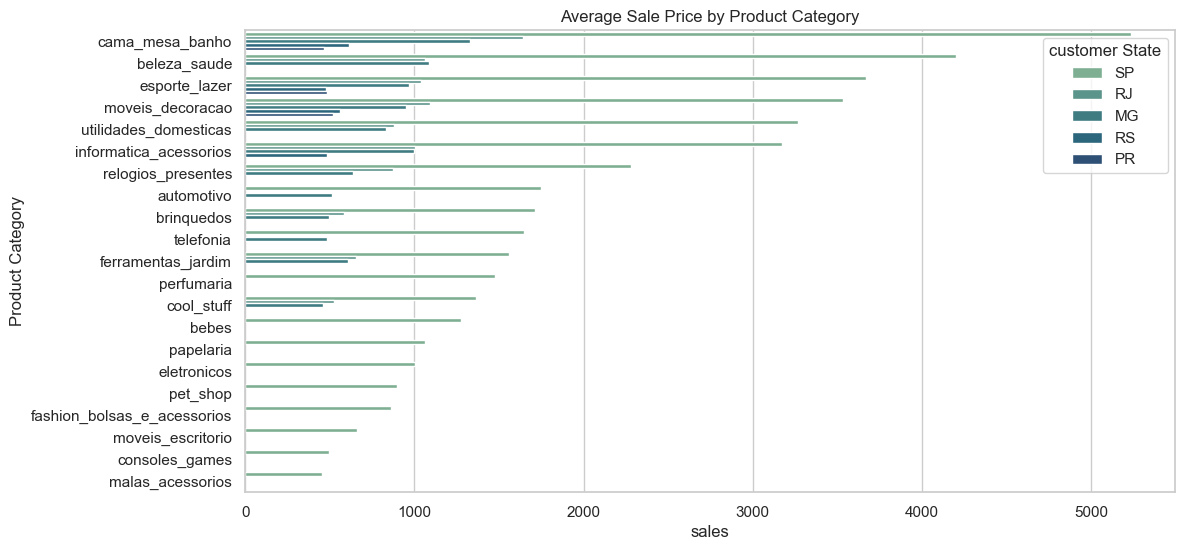

In [157]:
# Create a bar chart

#sns.set_style("whitegrid")

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sales', y='product_category_name', hue='customer_state' ,data=top_categories_by_location.head(50), palette='crest')
#plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.title('Average Sale Price by Product Category')
plt.legend(title='customer State')
#plt.gca().invert_yaxis()  # To display the highest average price at the top
#plt.tight_layout()
#ax.bar_label(ax.containers[0]) 
# Show plot
plt.show()

In [158]:
#Top Product Categories by order count for each Customer State

# Group by customer_state and product_category_name, then count product_id
ranked_sales = f_sales_data.groupby(['customer_state', 'product_category_name']).size().reset_index(name='Order_Count')

# Rank the sales within each customer_state
ranked_sales['rank'] = ranked_sales.groupby('customer_state')['Order_Count'].rank(method='first', ascending=False)

# Filter for the top-ranked products
top_sales = ranked_sales[ranked_sales['rank'] == 1]

# Select final columns
result = top_sales[['customer_state', 'product_category_name', 'Order_Count']]

result

,customer_state,product_category_name,Order_Count
19,AC,moveis_decoracao,12
34,AL,beleza_saude,63
75,AM,beleza_saude,20
109,AP,beleza_saude,10
136,BA,beleza_saude,350
198,CE,beleza_saude,167
252,DF,beleza_saude,246
314,ES,cama_mesa_banho,225
371,GO,cama_mesa_banho,235
429,MA,beleza_saude,89


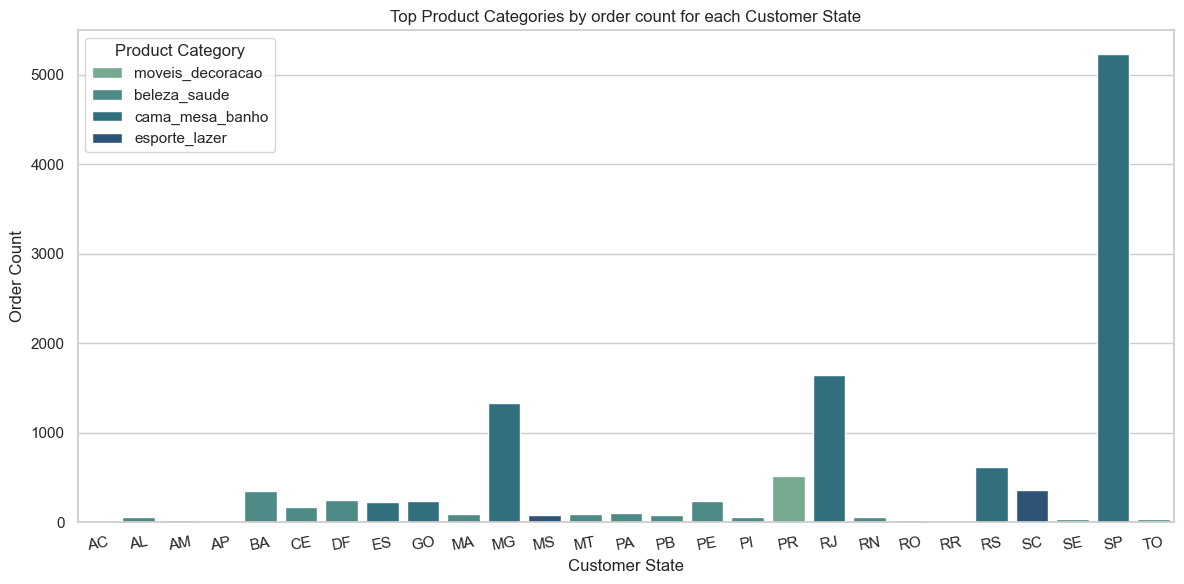

In [159]:
#Top Product Categories by order count for each Customer State

plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='customer_state', y='Order_Count', hue='product_category_name',palette='crest')

plt.title('Top Product Categories by order count for each Customer State')
plt.xlabel('Customer State')
plt.ylabel('Order Count')
plt.xticks(rotation=10)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()